In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# import from ../utils.py
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from utils import read_finalsum, get_dbref_data, get_uniprot_id, read_finalsum_decomp, read_scoresEnergetics

In [21]:
ns_data = pd.read_csv("lung_genes_sbna.csv")
ns_data = ns_data[ns_data['uniprot_num'] !="?"] 
ns_data

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role
0,AKT1,2UVM,A,MET,1,M,1,M,-3.289764,-0.887739,-0.599135,1.802890,N,NaN,1,oncogene
1,AKT1,2UVM,A,SER,2,S,2,S,-3.211822,-0.780412,-0.514186,1.917224,N,NaN,1,oncogene
2,AKT1,2UVM,A,ASP,3,D,3,D,-2.323640,-0.348912,-0.599135,1.375593,N,NaN,1,oncogene
3,AKT1,2UVM,A,VAL,4,V,4,V,-1.720478,-0.423430,-0.430810,0.866237,N,NaN,1,oncogene
4,AKT1,2UVM,A,ALA,5,A,5,A,-0.735485,-0.359177,0.880892,1.257200,N,NaN,1,oncogene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56749,TPR,5TVB,B,LEU,138,L,138,L,0.869016,0.553266,1.054734,0.738984,N,NaN,1,fusion
56750,TPR,5TVB,B,GLU,139,E,139,E,-1.423048,-0.462926,-0.178021,0.782101,N,NaN,1,fusion
56751,TPR,5TVB,B,TYR,140,Y,140,Y,-1.835492,-0.549891,-0.266930,1.018670,N,NaN,1,fusion
56752,TPR,5TVB,B,LEU,141,L,141,L,-1.310699,-0.105710,-0.106893,1.098095,N,NaN,1,fusion


In [22]:
# genes that have more than 1 structure 
tmp_genes = ns_data.groupby('gene')['pdb_id'].nunique()
tmp_genes = tmp_genes[tmp_genes > 1]
tmp_genes = list(tmp_genes.index)
tmp_genes
# 

['AKT1',
 'ALK',
 'BIRC6',
 'BRAF',
 'EED',
 'EGFR',
 'EPHA3',
 'ERBB4',
 'EZR',
 'FGFR2',
 'HIP1',
 'KDR',
 'KEAP1',
 'KIF5B',
 'KRAS',
 'MAP2K1',
 'NTRK2',
 'RB1',
 'ROS1',
 'SMARCA4',
 'SUB1',
 'TP53',
 'TPR']

In [23]:
tmp2

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role
51550,TP53,2J1Y,A,SER,95,S,94,S,-1.417710,-1.019481,-0.398229,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
51551,TP53,2J1Y,A,SER,96,S,95,S,-1.233626,-0.836437,-0.397189,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
51552,TP53,2J1Y,A,VAL,97,V,97,V,-0.454676,-0.582253,0.127577,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
51553,TP53,2J1Y,A,PRO,98,P,98,P,0.750498,-0.190613,0.941111,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
51554,TP53,2J1Y,A,SER,99,S,99,S,-1.079610,-0.755632,-0.323978,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52321,TP53,2J1Y,D,GLU,285,E,285,E,-0.362561,-0.157566,-0.204995,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
52322,TP53,2J1Y,D,GLU,286,E,286,E,-0.813249,-0.426407,-0.386842,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
52323,TP53,2J1Y,D,GLU,287,E,287,E,-1.552579,-1.173381,-0.379198,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG
52324,TP53,2J1Y,D,ASN,288,N,288,N,-1.589155,-1.158527,-0.430627,0.0,Y,"M133L, V203A, N239Y, G245S, N268D",1,TSG


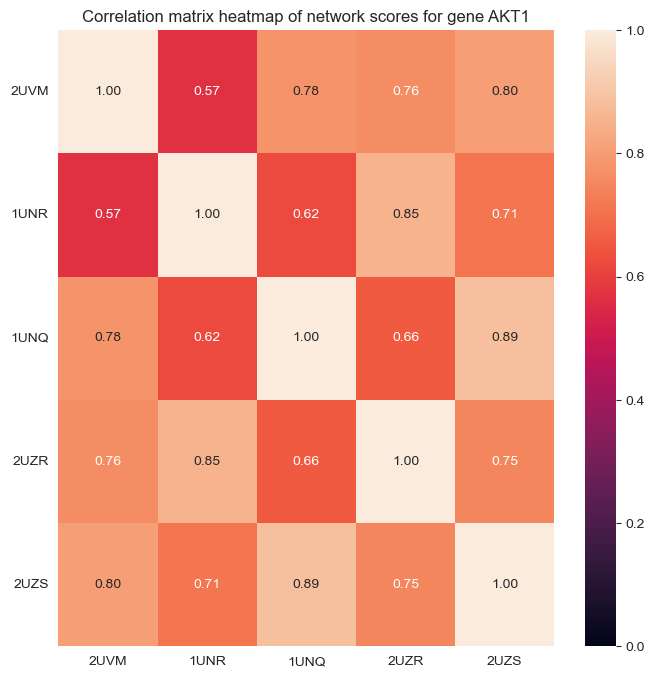

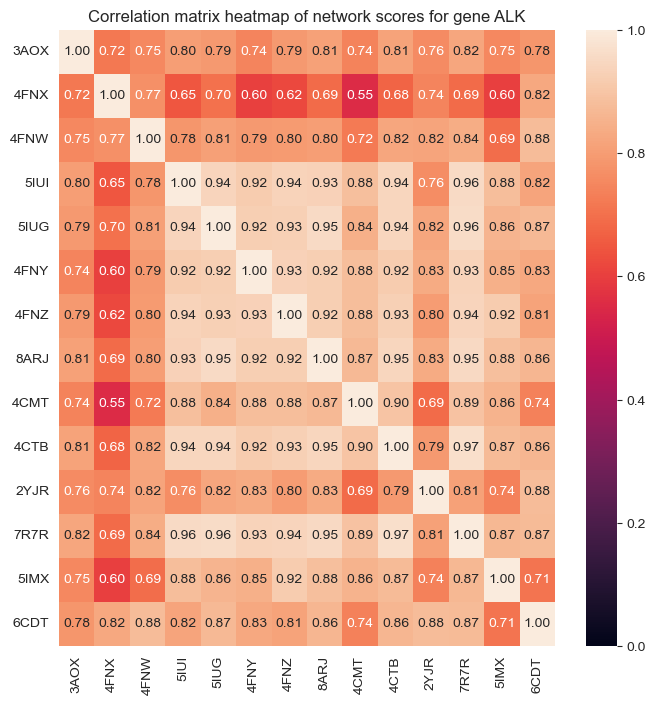

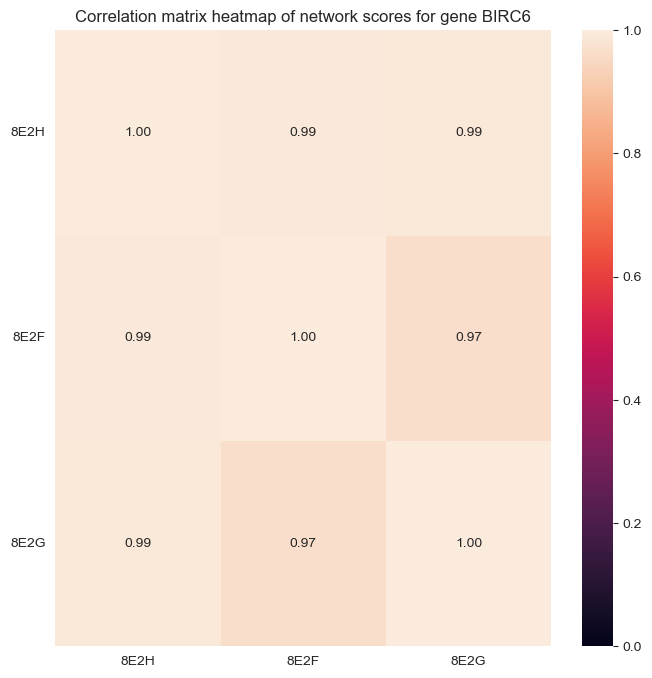

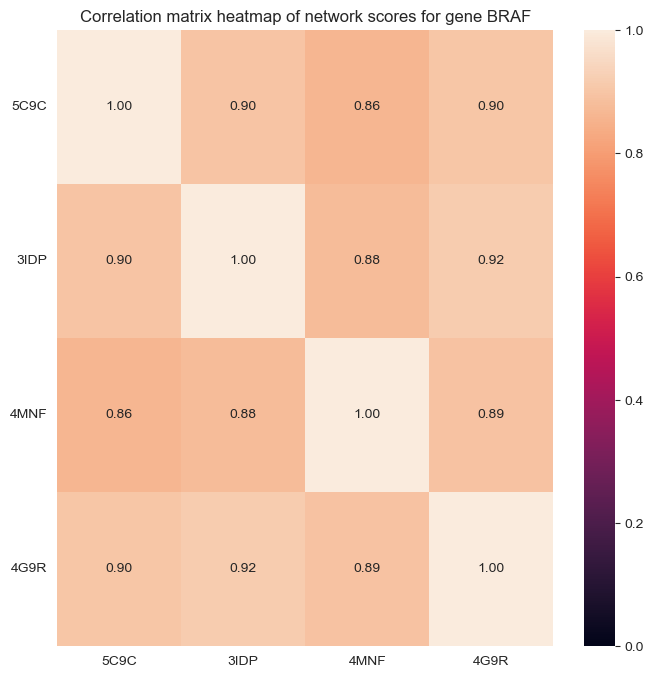

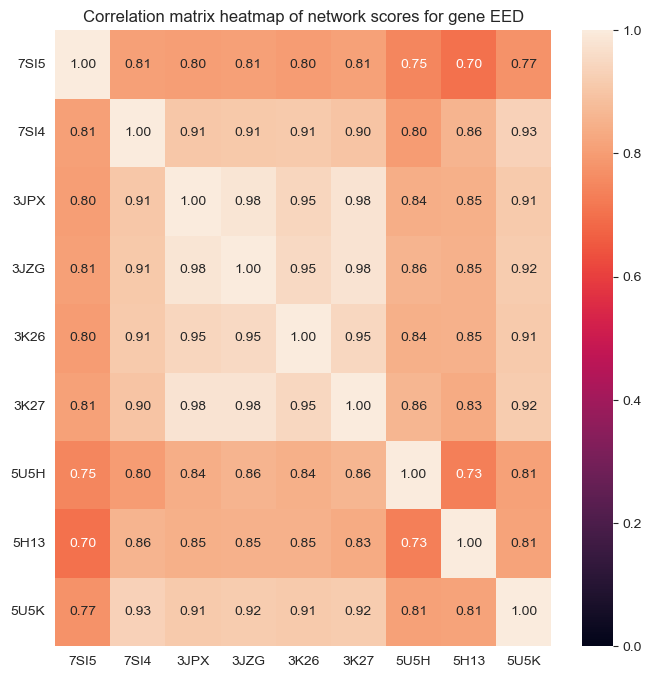

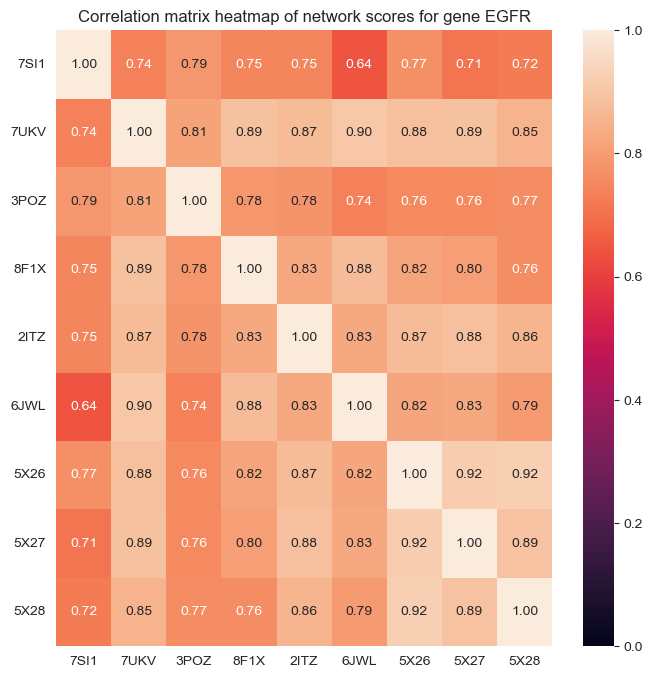

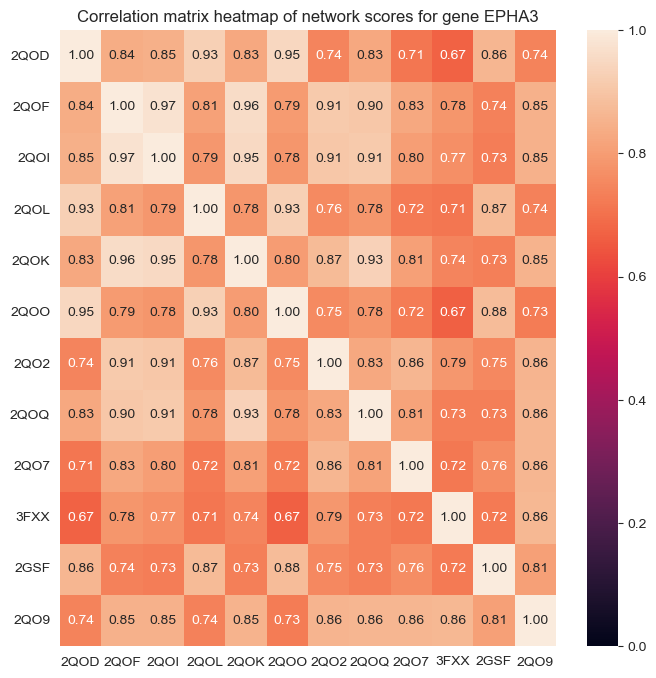

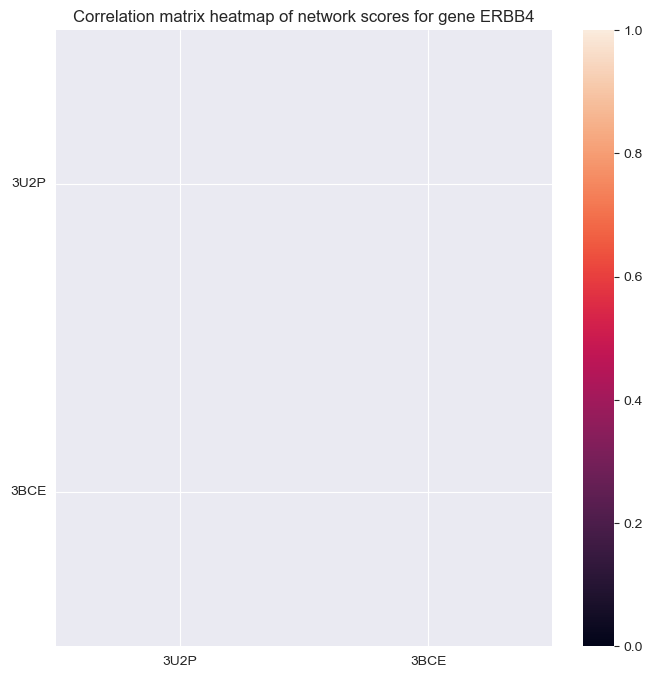

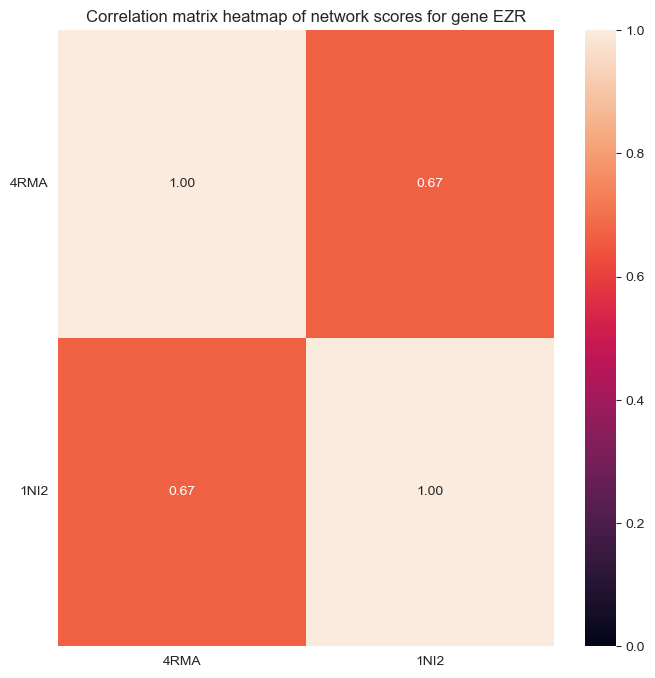

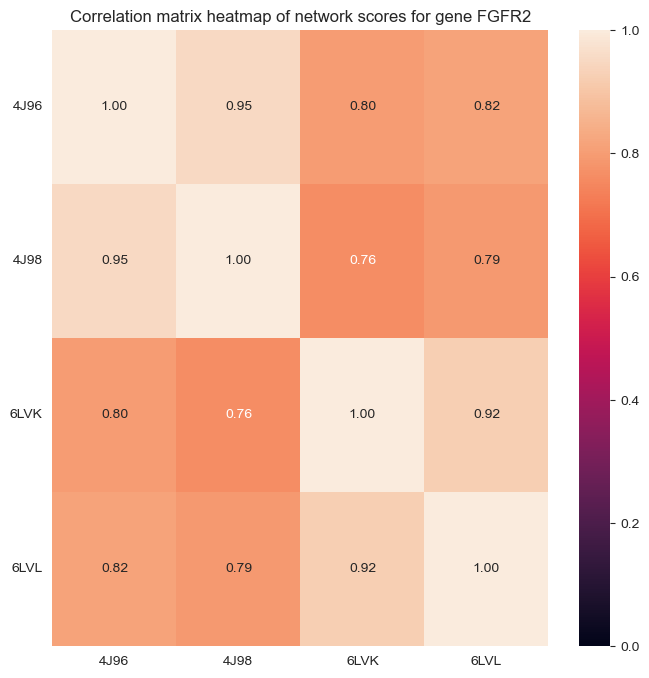

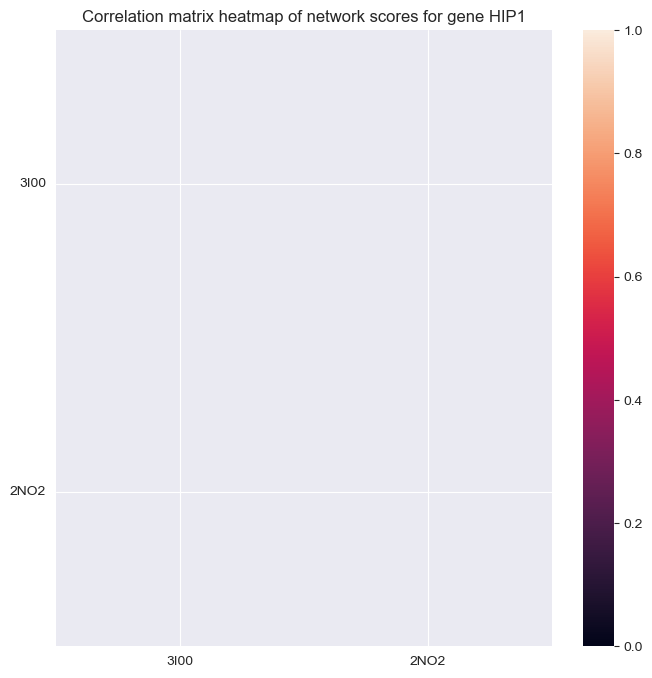

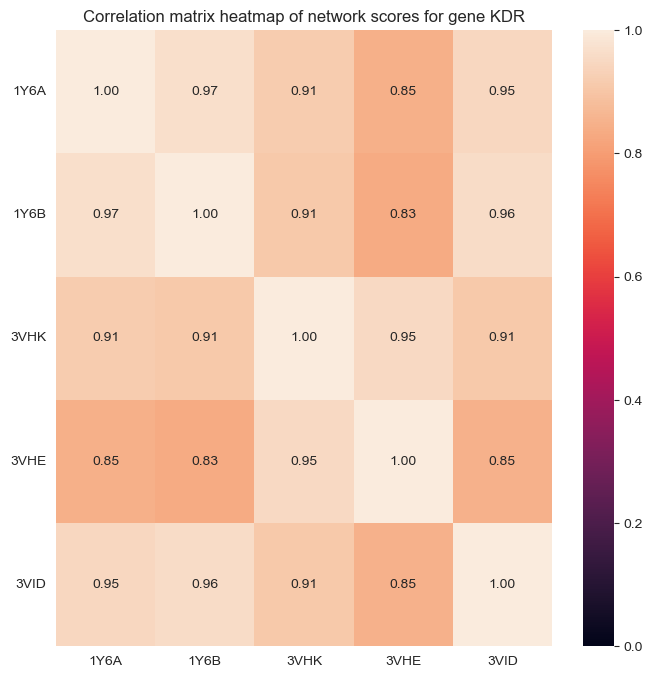

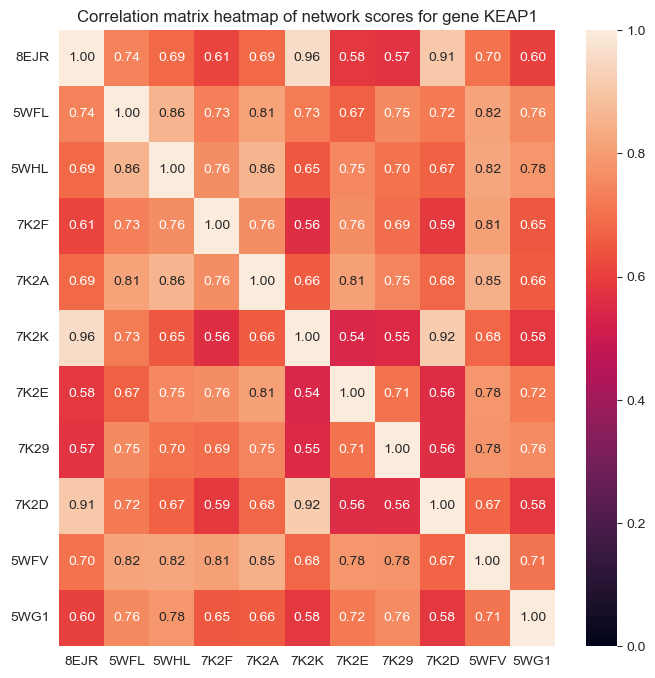

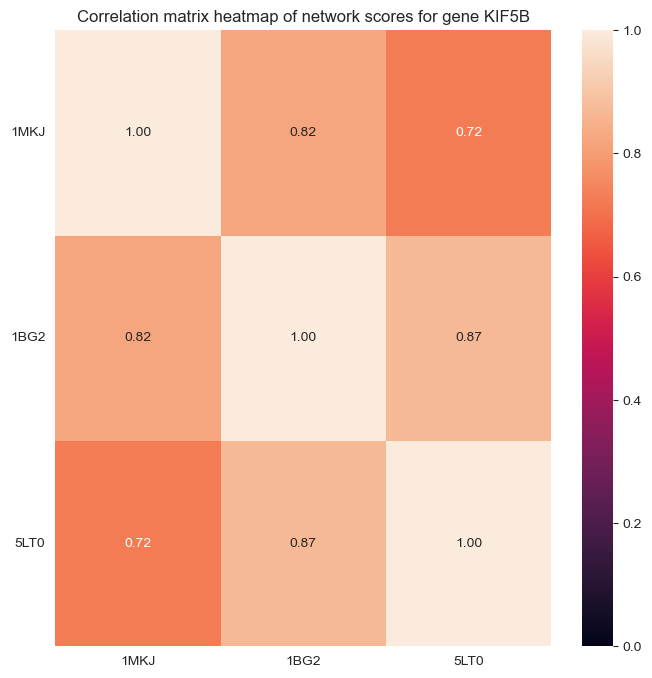

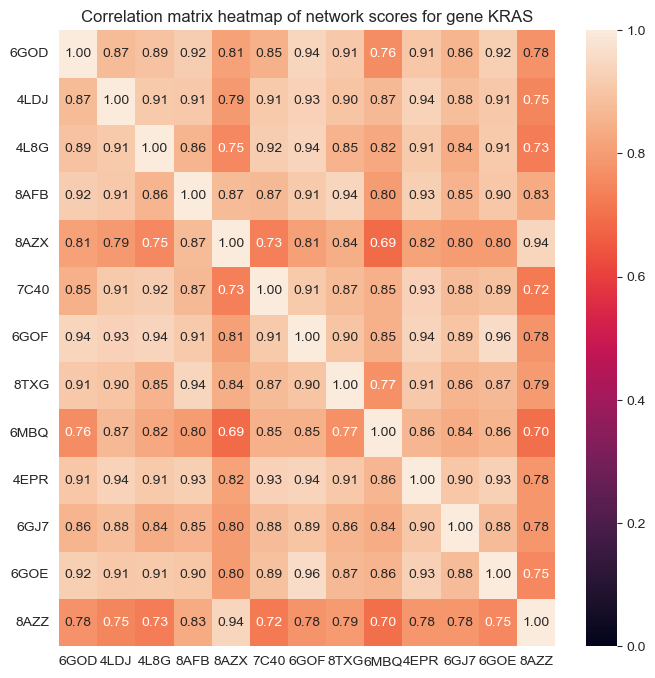

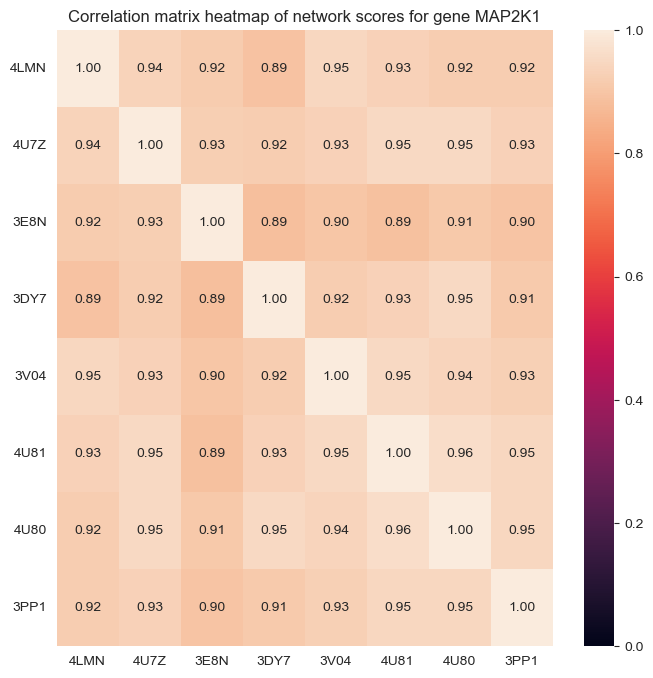

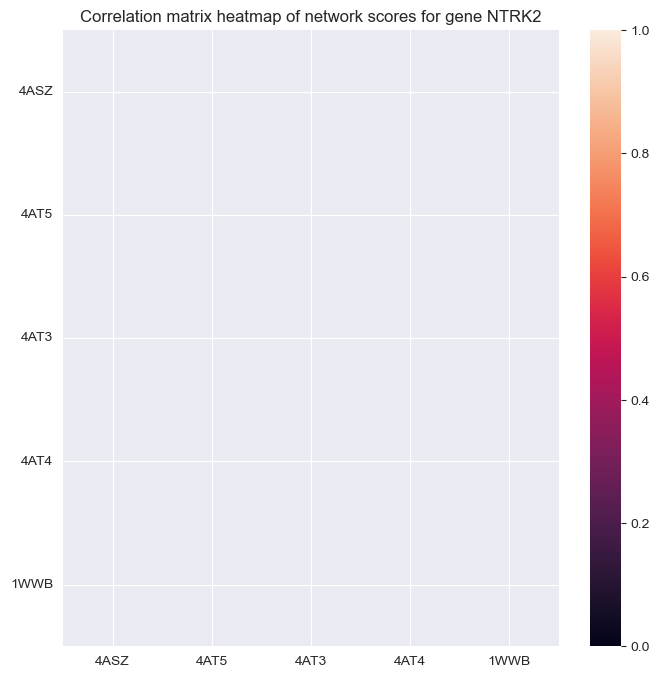

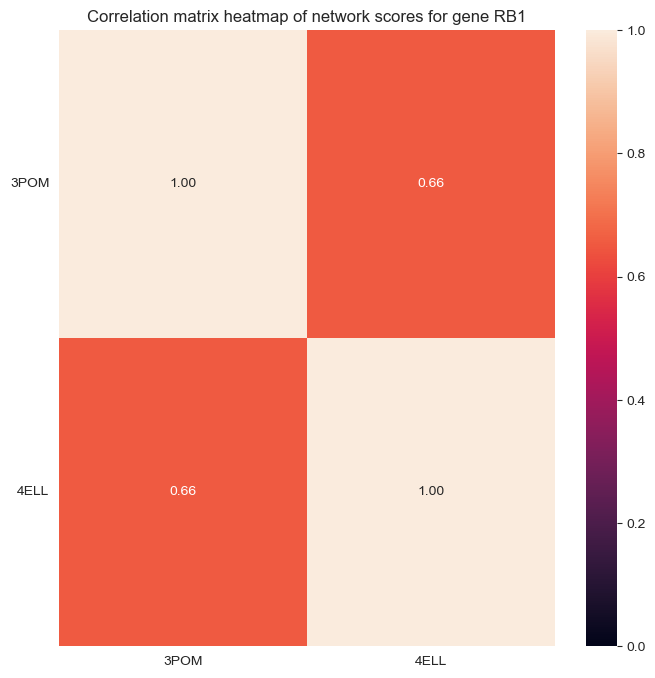

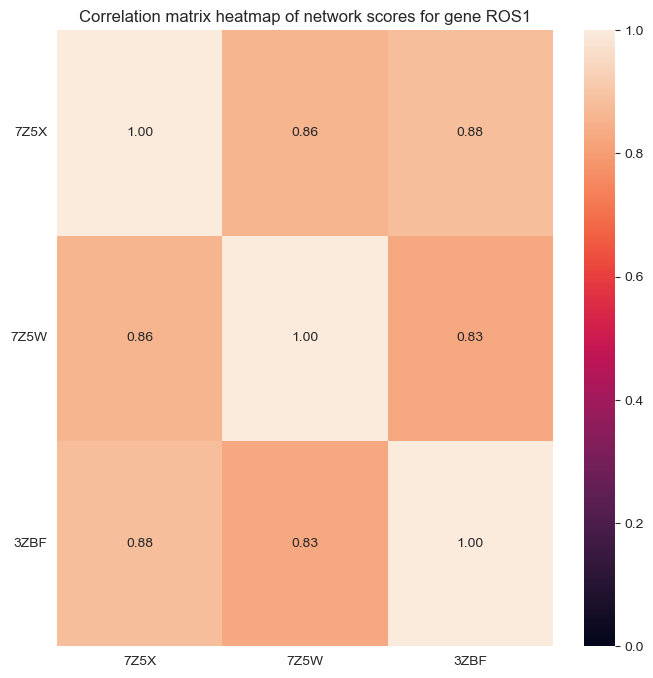

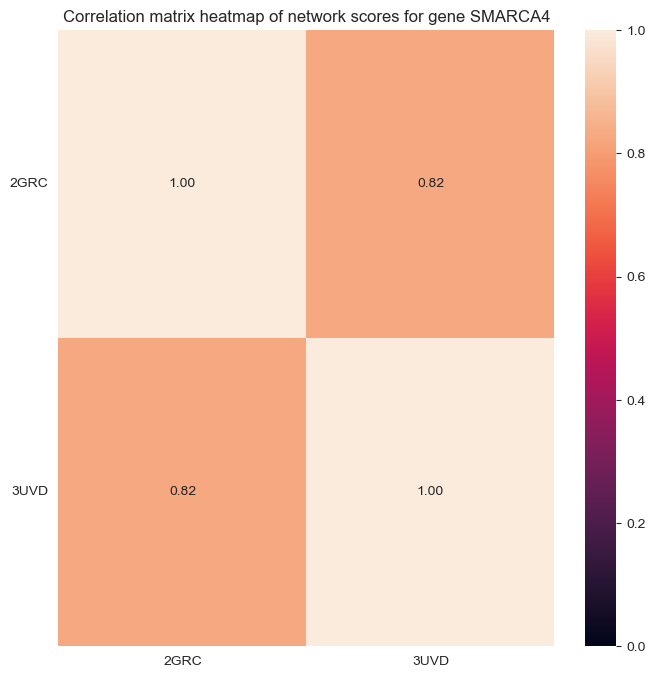

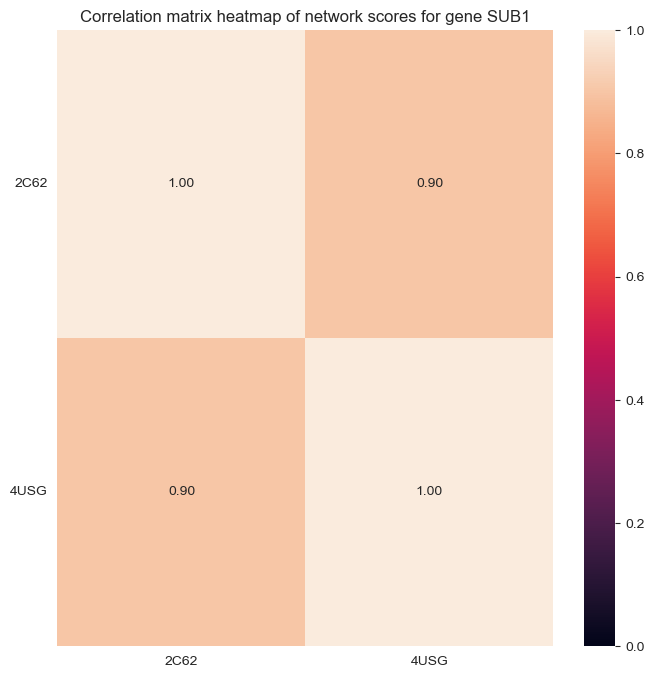

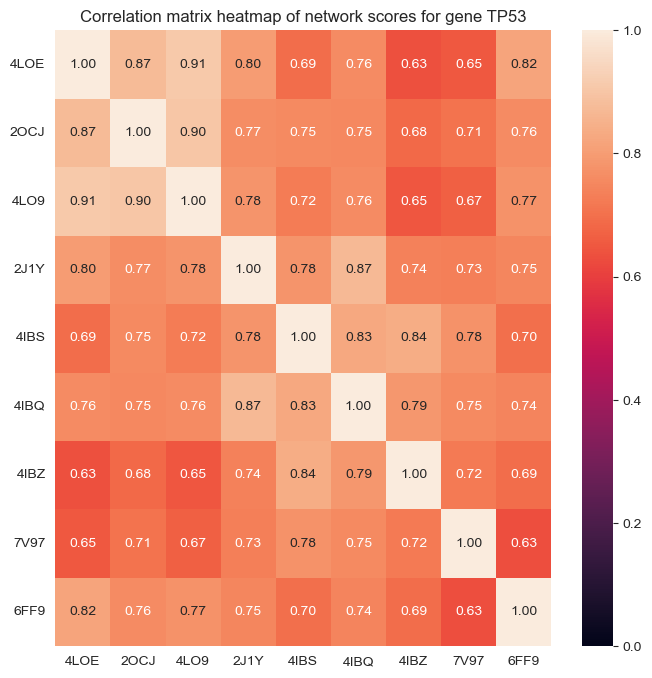

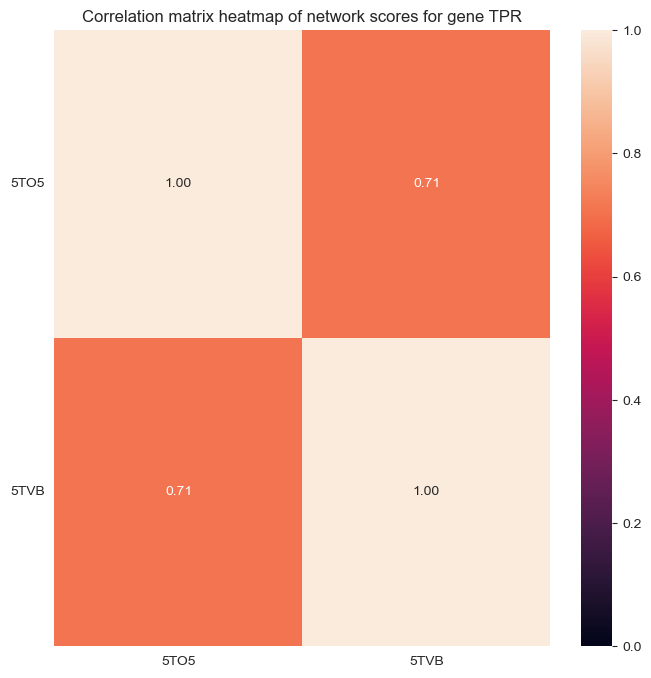

In [24]:
corr_data = {}

for gene in tmp_genes:
    tmp = ns_data[ns_data['gene']==gene]
    all_scores = pd.DataFrame()
    unique_pdbs = tmp['pdb_id'].unique()

    for pdb in unique_pdbs:
        # if count > max_count:
        #     break
        if "+" in pdb:
            # 4.00E+26
            pdb = pdb.replace("+", "").replace(".00", "")
        dbrefs = get_dbref_data(pdb)

        pdb_scores = pd.DataFrame()
        for i in dbrefs:
            if not os.path.exists(f"../sbna_results/{pdb}/{i['chain']}/{pdb}_monomer/FinalSum") or \
                get_uniprot_id(pdb, i['chain']) != i['uniprot']:
                continue

            tmp2 = tmp[(tmp['pdb_id']==pdb) & (tmp['chain']==i['chain'])][['uniprot_num', 'chain', 'network_score']].reset_index(drop=True)
            # tmp2.columns = ['uniprot_num',  f"{pdb}_{i['chain']}"]
            tmp2.columns = ['uniprot_num',  "chain", pdb]
            pdb_scores = pd.concat([pdb_scores, tmp2])
        # break
        if not len(all_scores):
            all_scores = pdb_scores
            continue
        all_scores = pd.merge(all_scores, pdb_scores, on=['uniprot_num', 'chain'], how='inner')

    all_scores['uniprot_num'] = all_scores['uniprot_num'].astype(int)
    all_scores.sort_values('uniprot_num', inplace=True)
    all_scores.reset_index(drop=True, inplace=True)
    corr_data[gene] = all_scores


    # correlation
    plt.figure(figsize=(8, 8))
    sns.heatmap(all_scores.drop(['uniprot_num', 'chain'], axis=1).corr(), vmin=0, vmax=1, annot=True, fmt=".2f")
    plt.title(f'Correlation matrix heatmap of network scores for gene {gene}')
    # xlabel horizontal
    plt.yticks(rotation=0)
    plt.show()

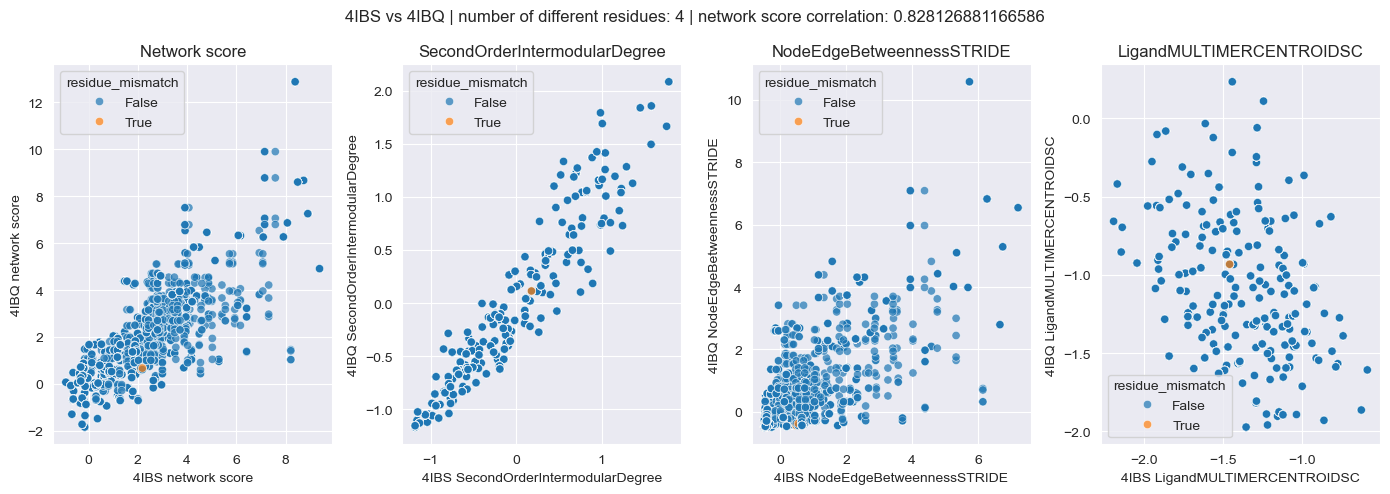

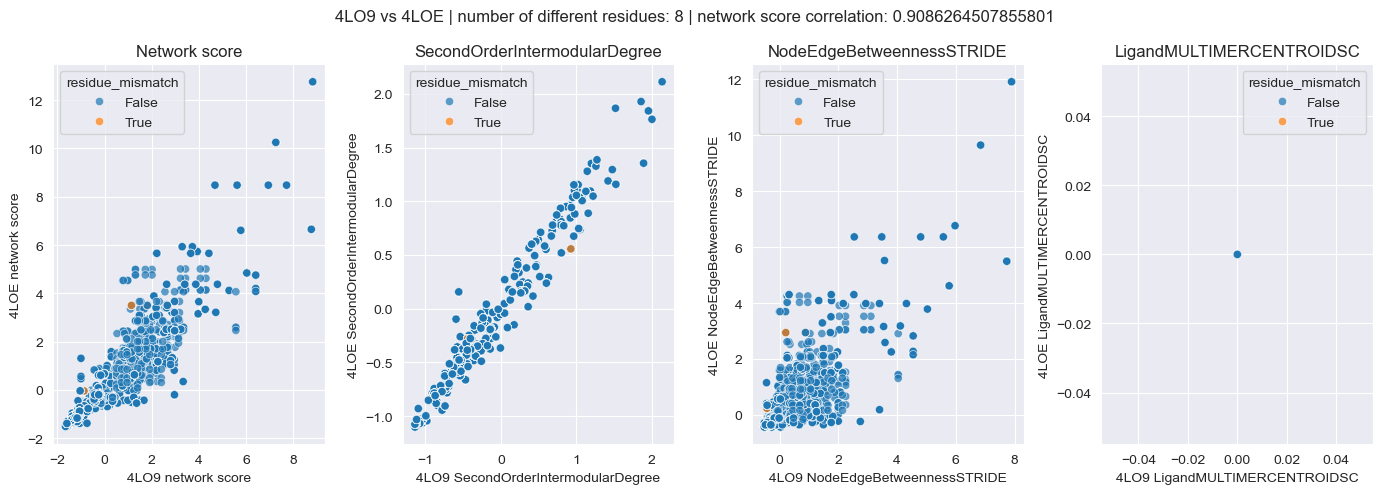

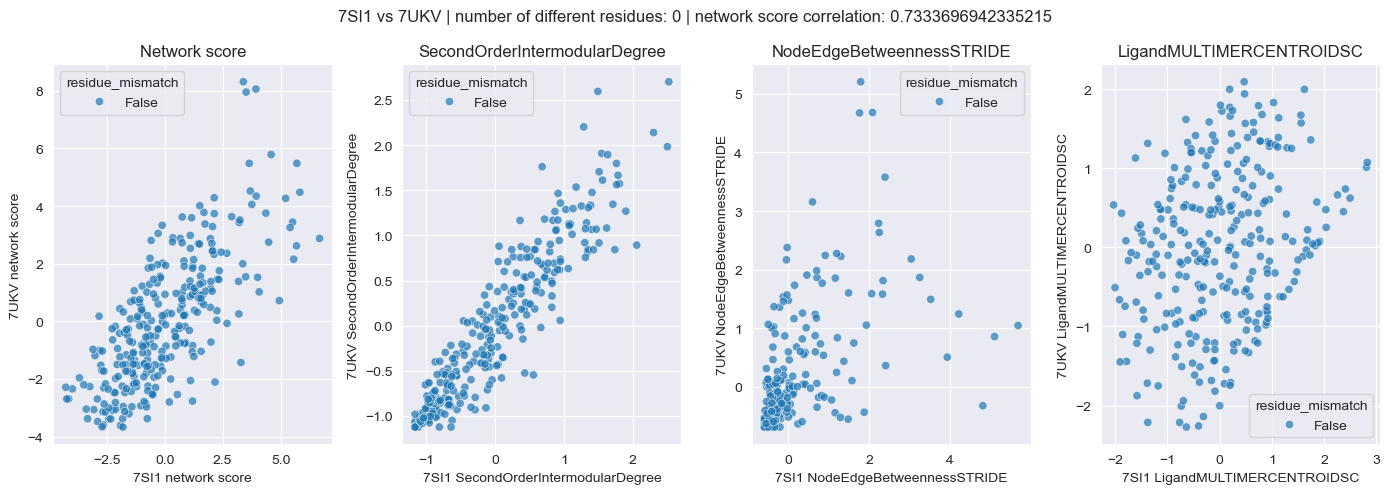

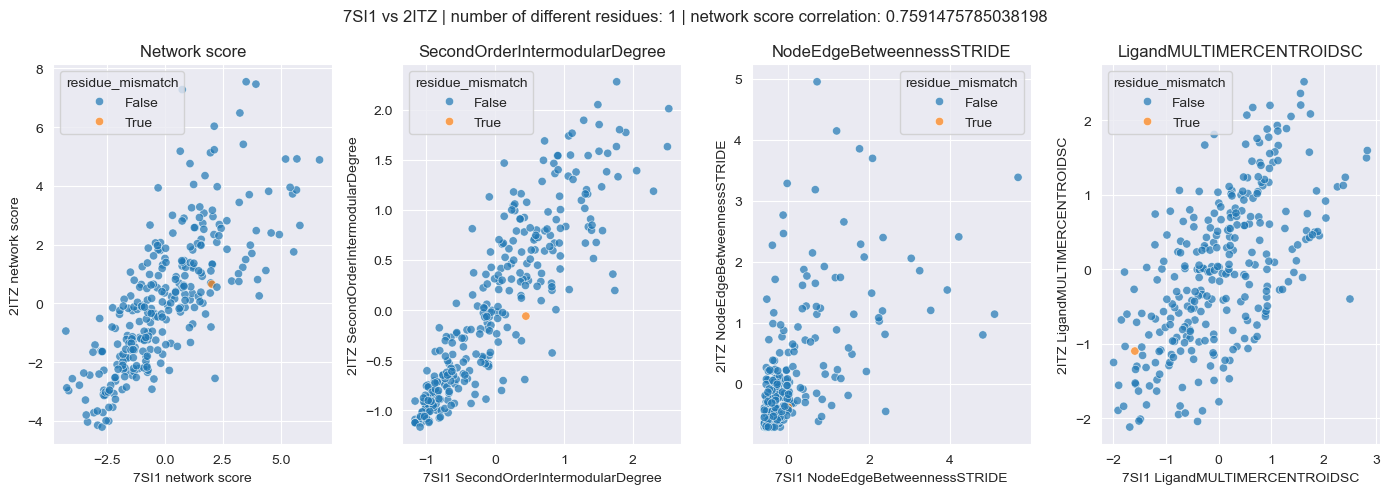

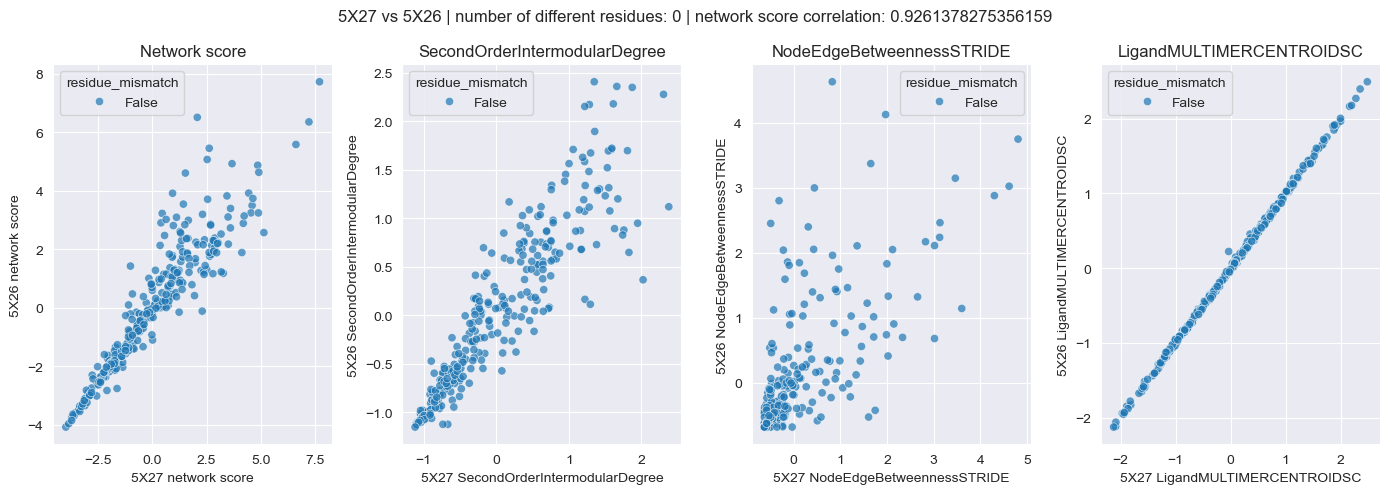

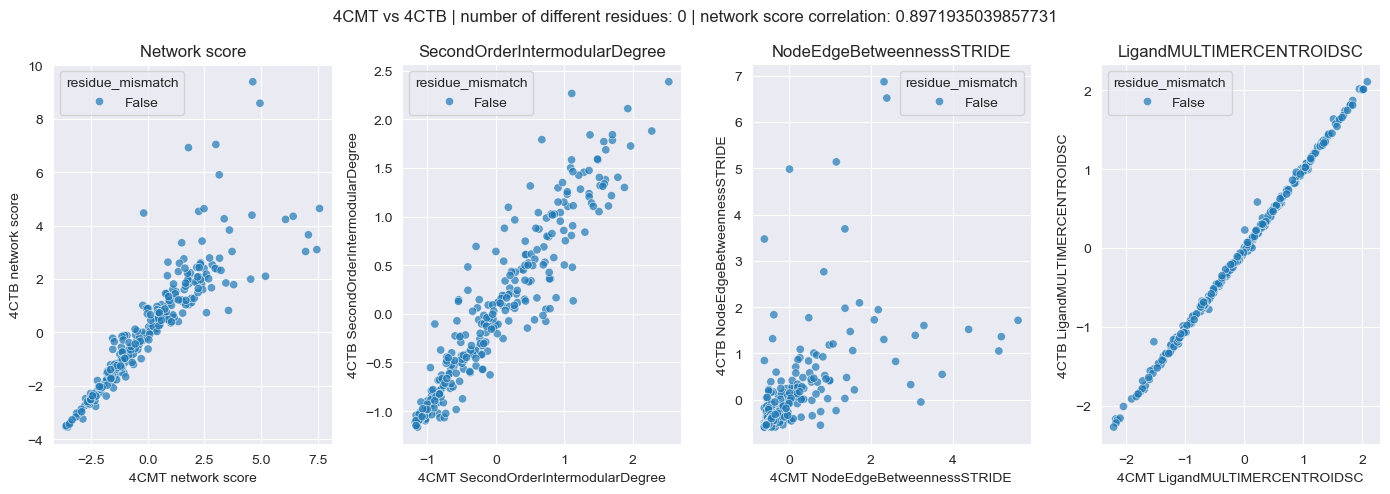

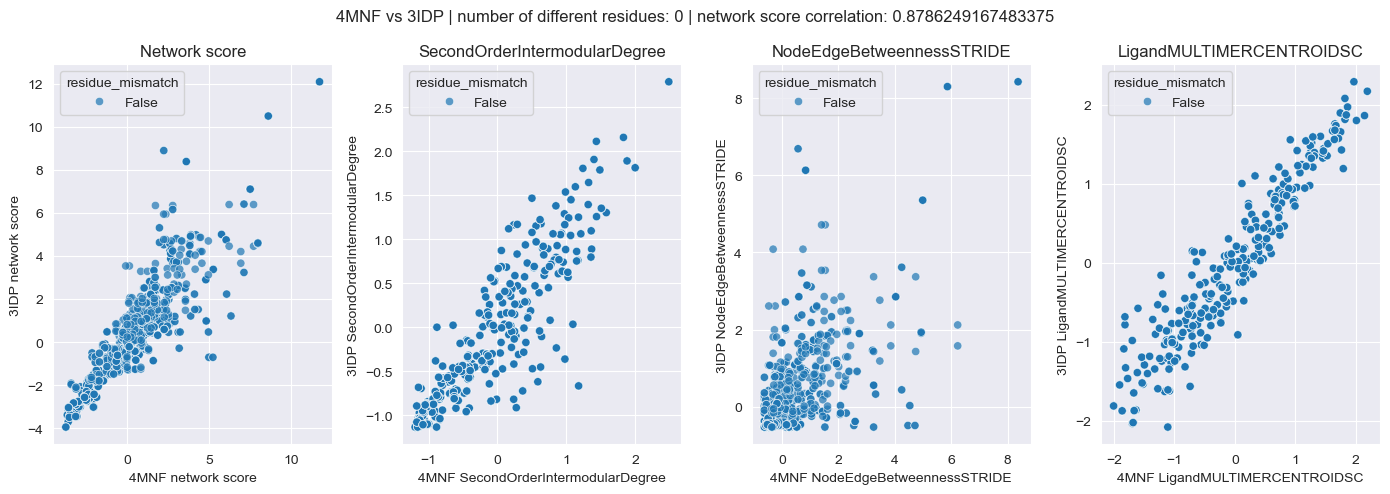

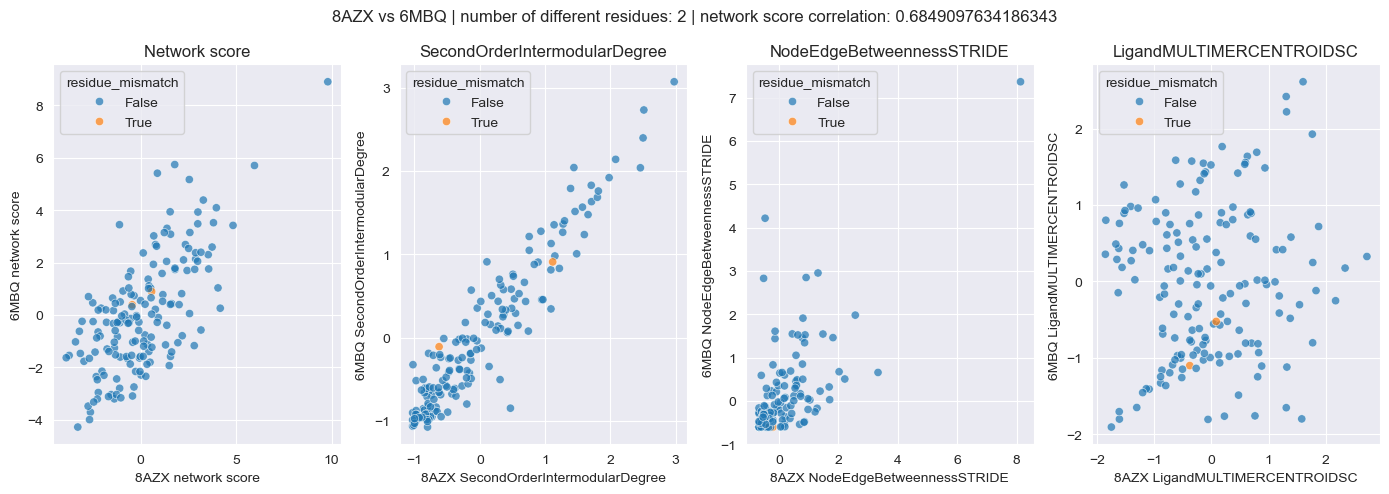

,uniprot_num,sbna_aa1_x,chain_x,network_score_x,SecondOrderIntermodularDegree_AVERAGE_x,NodeEdgeBetweennessSTRIDE_sidechain_MAX_x,LigandMULTIMERCENTROIDSC_MIN_x,sbna_aa1_y,chain_y,network_score_y,SecondOrderIntermodularDegree_AVERAGE_y,NodeEdgeBetweennessSTRIDE_sidechain_MAX_y,LigandMULTIMERCENTROIDSC_MIN_y,residue_mismatch
0,12,C,A,-0.444208,-0.622699,-0.198557,-0.377048,G,A,0.388039,-0.109033,-0.605398,-1.102470,True
1,2,T,A,-1.075259,-0.382085,-0.055926,0.637248,T,A,-1.607598,-0.610229,-0.126120,0.871249,False
2,3,E,A,-0.064710,-0.271595,-0.570205,-0.777090,E,A,-1.642398,-0.580663,-0.452980,0.608755,False
3,4,Y,A,0.766515,0.278046,0.572475,0.084007,Y,A,0.214020,0.138583,0.453140,0.377703,False
4,5,K,A,1.560450,-0.472604,0.188850,-1.844205,K,A,-1.583916,-0.252345,-0.531379,0.800191,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,160,V,A,0.663659,0.354868,0.641769,0.332978,V,A,1.932150,0.249710,1.521366,-0.161073,False
159,161,R,A,-3.215025,-0.892783,-0.492126,1.830115,R,A,-0.623602,-0.629542,-0.114972,-0.120912,False
160,162,E,A,-2.691612,-0.632641,-0.666948,1.392023,E,A,-1.657356,-0.601727,-0.476447,0.579182,False
161,163,I,A,-0.105221,0.346057,-0.528605,-0.077327,I,A,-0.590773,0.339247,-0.376218,0.553802,False


In [25]:
def plot_data(df, pdb1, pdb):
    tmp1 = df[df['pdb_id']==pdb1][['uniprot_num','sbna_aa1', 'chain', 'network_score', 'SecondOrderIntermodularDegree_AVERAGE', 'NodeEdgeBetweennessSTRIDE_sidechain_MAX', 'LigandMULTIMERCENTROIDSC_MIN']]
    tmp2 = df[df['pdb_id']==pdb][['uniprot_num','sbna_aa1', 'chain', 'network_score', 'SecondOrderIntermodularDegree_AVERAGE', 'NodeEdgeBetweennessSTRIDE_sidechain_MAX', 'LigandMULTIMERCENTROIDSC_MIN']]

    tmp = tmp1.merge(tmp2, on='uniprot_num')
    tmp['residue_mismatch'] = (tmp['sbna_aa1_x'] != tmp['sbna_aa1_y']) & (tmp['chain_x'] == tmp['chain_y'])


    # plot the network score, secondorderintermodulardegree, nodeedgebetweennessstride, ligandmultimercentroidsc for 4IBS and 4IBQ and highlight the residues that are different
    # as subplots
    fig, ax = plt.subplots(1,4, figsize=(14,5))
    sns.scatterplot(x='network_score_x', y='network_score_y', hue='residue_mismatch', data=tmp, ax=ax[0], alpha=0.7)
    ax[0].set_xlabel(f'{pdb1} network score')
    ax[0].set_ylabel(f'{pdb} network score')
    ax[0].set_title('Network score')

    sns.scatterplot(x='SecondOrderIntermodularDegree_AVERAGE_x', y='SecondOrderIntermodularDegree_AVERAGE_y', hue='residue_mismatch', data=tmp, ax=ax[1], alpha=0.7)
    ax[1].set_xlabel(f'{pdb1} SecondOrderIntermodularDegree')
    ax[1].set_ylabel(f'{pdb} SecondOrderIntermodularDegree')
    ax[1].set_title('SecondOrderIntermodularDegree')

    sns.scatterplot(x='NodeEdgeBetweennessSTRIDE_sidechain_MAX_x', y='NodeEdgeBetweennessSTRIDE_sidechain_MAX_y', hue='residue_mismatch', data=tmp, ax=ax[2], alpha=0.7)
    ax[2].set_xlabel(f'{pdb1} NodeEdgeBetweennessSTRIDE')
    ax[2].set_ylabel(f'{pdb} NodeEdgeBetweennessSTRIDE')
    ax[2].set_title('NodeEdgeBetweennessSTRIDE')

    sns.scatterplot(x='LigandMULTIMERCENTROIDSC_MIN_x', y='LigandMULTIMERCENTROIDSC_MIN_y', hue='residue_mismatch', data=tmp, ax=ax[3], alpha=0.7)
    ax[3].set_xlabel(f'{pdb1} LigandMULTIMERCENTROIDSC')
    ax[3].set_ylabel(f'{pdb} LigandMULTIMERCENTROIDSC')
    ax[3].set_title('LigandMULTIMERCENTROIDSC')

    plt.suptitle(f'{pdb1} vs {pdb} | number of different residues: {tmp["residue_mismatch"].sum()} | network score correlation: {tmp["network_score_x"].corr(tmp["network_score_y"])}')

    plt.tight_layout()
    plt.show()

    return tmp

tmp = plot_data(ns_data, '4IBS', '4IBQ')
plot_data(ns_data, '4LO9', '4LOE')
plot_data(ns_data, '7SI1', '7UKV')
plot_data(ns_data, '7SI1', '2ITZ')
plot_data(ns_data, '5X27', '5X26')
# plot_data(ns_data, '5X26', '5X28')
plot_data(ns_data, '4CMT', '4CTB')
plot_data(ns_data, '4MNF', '3IDP')
plot_data(ns_data, '8AZX', '6MBQ')



In [26]:
# create a dataframe with column gene, pdb-pdb, correlation, percentage_match
# ns_data['pdb_chain'] = ns_data['pdb_id'] + '_' + ns_data['chain']

all_data = pd.DataFrame()
for gene in tmp_genes:
    for pdb1 in corr_data[gene].columns[2:]:
        for pdb2 in corr_data[gene].columns[2:]:
            if pdb1 == pdb2:
                continue
            tmp1 = ns_data[ns_data['pdb_id']==pdb1]
            tmp2 = ns_data[ns_data['pdb_id']==pdb2]
            # join two dataframes
            tmp = pd.merge(tmp1, tmp2, on=['uniprot_num', 'chain'], how='inner', suffixes=('_'+pdb1, '_'+pdb2))
            # percentage match pdb_res
            perc_match = (tmp['sbna_aa1_'+pdb1] == tmp['sbna_aa1_'+pdb2]).mean()
            mismatch_count = (tmp['sbna_aa1_'+pdb1] != tmp['sbna_aa1_'+pdb2]).sum()
            # correlation
            corr = corr_data[gene][[pdb1, pdb2]].corr().iloc[0,1]
            all_data = pd.concat([all_data, pd.DataFrame({'gene': [gene], 'pdb_pdb': [f"{pdb1}-{pdb2}"], 'correlation': [corr], 'percentage_match': [perc_match], 'mismatch_count': [mismatch_count]})])

all_data.reset_index(drop=True, inplace=True)

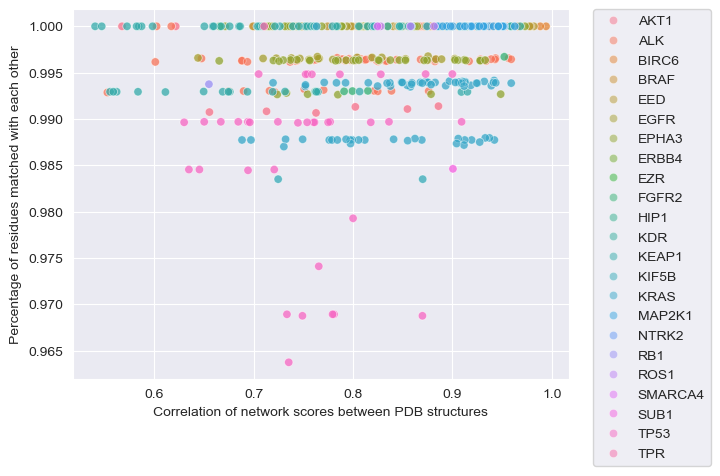

In [27]:
# plot scatter plot
sns.scatterplot(data=all_data, x='correlation', y='percentage_match', hue='gene', alpha=0.5)
plt.xlabel('Correlation of network scores between PDB structures')
plt.ylabel('Percentage of residues matched with each other')
# put legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

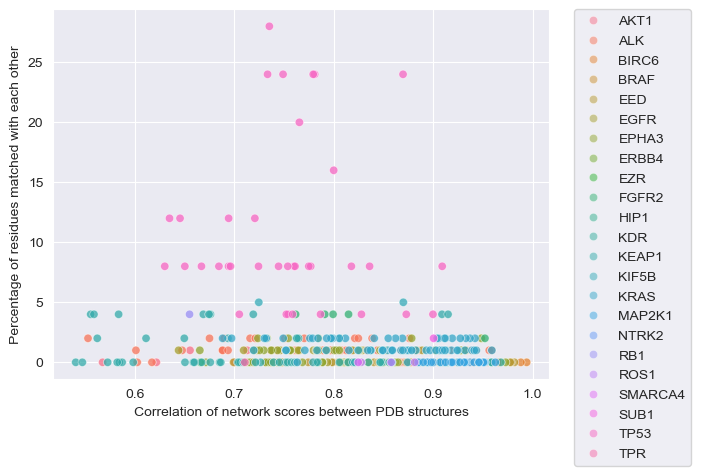

In [28]:
# plot scatter plot
sns.scatterplot(data=all_data, x='correlation', y='mismatch_count', hue='gene', alpha=0.5)
plt.xlabel('Correlation of network scores between PDB structures')
plt.ylabel('Percentage of residues matched with each other')
# put legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

* there's not much correlation here between how many mismatches there are and their correlation. it could be something else...